<a href="https://colab.research.google.com/github/ayanhmm/Facemask-Detection/blob/main/yolov4tiny_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#!fusermount -u /content/gdrive
#unmount drive

In [5]:
!nvidia-smi


Wed Oct 18 16:42:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

import dataset

In [6]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/defyolo/kaggle/kaggle.json"

#move to kaggle forlder
#%cd "/content/drive/MyDrive/defyolo/kaggle"

#import kaggle workshop
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/defyolo/kaggle'

#download kaggle dataset to drive using api
#!kaggle datasets download -d livr00/fsoco-bounding-boxes

#unzip the dataset folder
#                       (zip file)                                        (location of extraction)
#!unzip "/content/drive/MyDrive/kaggle/fsoco-bounding-boxes.zip" -d "/content/drive/MyDrive/custom_data"


darknet

In [7]:
%cd '/content/gdrive/MyDrive/defyolo/darky'
!ls

%cd '/content/gdrive/MyDrive/defyolo/curropt/darknet'
!ls

/content/gdrive/MyDrive/defyolo/darky
/content/gdrive/MyDrive/defyolo/curropt/darknet
3rdparty		darknet_images.py      libdarknet.so	README.md
backup			darknet.py	       LICENSE		results
build			darknet_video.py       Makefile		scripts
build.ps1		data		       net_cam_v3.sh	src
cfg			docker-compose.yml     net_cam_v4.sh	uselib
chart.png		Dockerfile.cpu	       obj		vcpkg.json
chart_v4tinycustom.png	Dockerfile.gpu	       package.xml	vcpkg.json.opencv23
cmake			image_yolov3.sh        photo.jpg	video_yolov3.sh
CMakeLists.txt		image_yolov4.sh        predictions.jpg	video_yolov4.sh
darknet			include		       process.py	yolov4-tiny.conv.29
DarknetConfig.cmake.in	json_mjpeg_streams.sh  __pycache__	yolov4-tiny.conv.29.1


In [8]:
#!git clone https://github.com/AlexeyAB/darknet

In [33]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd '/content/gdrive/MyDrive/defyolo/curropt/darknet'
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/defyolo/curropt/darknet


In [34]:
#build darknet with the above set conditions of cudnn
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https:/

In [9]:
# # list contents in yolov4-tiny folder in your drive
# !ls '/mydrive/v4tiny'
# !ls '/content/gdrive/MyDrive/defyolo/'
# !ls '/content/gdrive/MyDrive/defyolo/v4tiny'
# !ls '/content/gdrive/MyDrive/defyolo/darknet'

%cd '/content/gdrive/MyDrive/defyolo/curropt/darknet'

/content/gdrive/MyDrive/defyolo/curropt/darknet


In [10]:
#mount drive
#just to make sure there was no issue in mounting earliar
%cd ..
from google.colab import drive
drive.mount('/content/gdrive/')

/content/gdrive/MyDrive/defyolo/curropt
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [11]:
#find and remove all symbolic links
!find /content/ -type l -delete

#remove existing my drive
!rm -r /mydrive

# this creates a symbolic link
#that means that now the path /content/gdrive/MyDrive/defyolo/ can be abbreviated as /mydrive
!ln -s /content/gdrive/MyDrive/defyolo/ /mydrive

# list contents in yolov4-tiny folder in your drive
#just to make sure the symbolic link is perfectly working
!ls /mydrive/v4tiny/


obj.data  obj.names  process.py  training  v4tinycustom.cfg


In [12]:
# # Clean the data and cfg folders first except the labels folder in data which is required

# %cd data/
# !find -maxdepth 1 -type f -exec rm -rf {} \;
# %cd ..

# %rm -rf cfg/
# %mkdir cfg




!find -maxdepth 1 -type f -exec rm -rf {} \;

!: This is typically used in Jupyter Notebooks or platforms like Google Colab to execute shell commands.

find: The main command being used, which searches for files.

-maxdepth 1: Limits the search to the current directory.

-type f: Specifies that we're only looking for files.

-exec: Indicates that for each file found, the command that follows should be executed.

rm -rf {}: The command to remove/delete each found file. Here, {} gets replaced by each file found by the find command.

\;: This signifies the end of the -exec action.

In [ ]:
# #copy the datasets zip file to the root darknet folder in data/obj
# !cp /mydrive/yolov4-tiny/obj.zip ../

# # unzip the datasets and their contents so that they are now in /darknet/data/obj folder
# !unzip ../obj.zip -d data/



# #copy the custom cfg file from the drive to the darknet/cfg folder
# !cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg



# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
# !cp /mydrive/v4tiny/obj.names ./data
# !cp /mydrive/v4tiny/obj.data  ./data



# #copy the process.py file from the drive to the darknet directory
# !cp /mydrive/yolov4-tiny/process.py ./

In [13]:
# # run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
# !python process.py

# # list the contents of data folder to check if the train.txt and test.txt files have been created
# !ls data/

In [14]:
# # Download the yolov4-tiny pre-trained weights file
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [15]:
# # train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# # %%capture

# !./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map



# # This stops 'Run all' at this cell by causing an error
# assert False



# #to restart training your custom detector where you left off(using the weights that were saved last)
# !./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_last.weights -dont_show -map





In [48]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  #it allows the output of plotting commands to be displayed inline within the notebook, directly below the code cell that produced it.

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf() #gcf=get current figure.   #plt.gcf() gets the current active figure in matplotlib. If no figure is active, a new one is created.   #The figure is then stored in the variable fig
  fig.set_size_inches(18, 10) #resize fig
  plt.axis("off") #removes the axes from the image to keep the image un-cluttered


  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  # OpenCV reads images in BGR (Blue, Green, Red) channel order, whereas matplotlib's imshow expects images in RGB (Red, Green, Blue) order.
  # line in bracketts converts the resized_image from BGR to RGB format.
  # plt.imshow() then displays the RGB image.

  #plt.show('')

/content/gdrive/MyDrive/defyolo/curropt/darknet


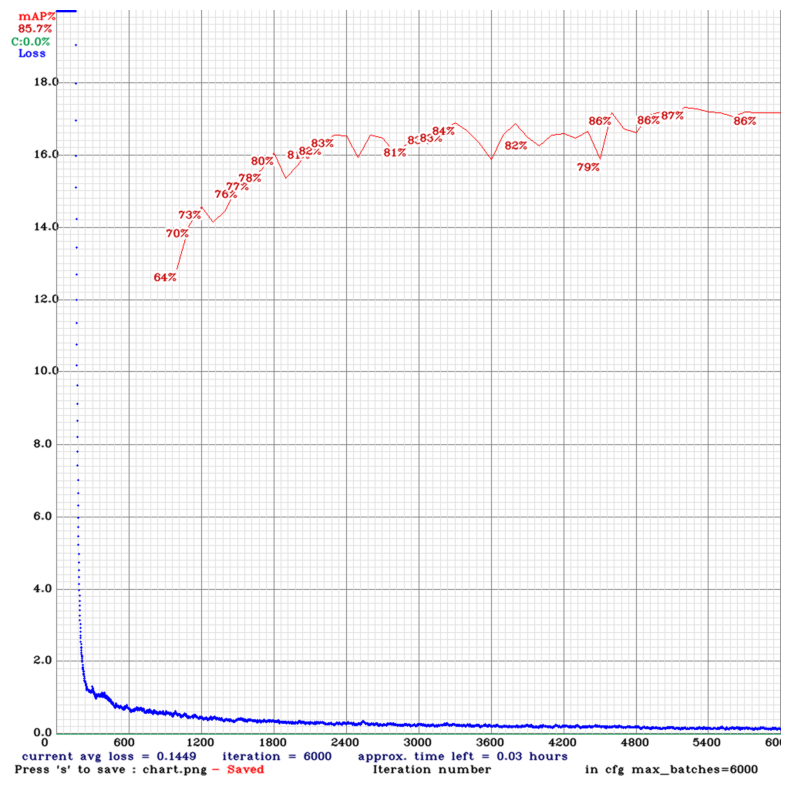

In [49]:
%cd '/content/gdrive/MyDrive/defyolo/curropt/darknet'

#only works if the training does not get interrupted
imShow('chart.png')
#basically checks if opencv is working properly

In [18]:
#Make sure the darknet executable has the necessary execution permissions.
!chmod +x /mydrive/curropt/darknet
!chmod +x '/content/gdrive/MyDrive/defyolo/curropt/darknet'

!cp /content/gdrive/MyDrive/defyolo/curropt/darknet ./darknet
!chmod +x ./darknet



cp: -r not specified; omitting directory '/content/gdrive/MyDrive/defyolo/curropt/darknet'


In [24]:
%cd '/content/gdrive/MyDrive/defyolo/curropt/darknet'

#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )
!./darknet detector map '/content/gdrive/MyDrive/defyolo/curropt/darknet/data/obj.data' '/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg/v4tinycustom.cfg' '/content/gdrive/MyDrive/defyolo/v4tiny/training/v4tinycustom_best.weights' -points 0


/content/gdrive/MyDrive/defyolo/curropt/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 -> 

In [25]:
#set your custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' v4tinycustom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' v4tinycustom.cfg
%cd ..

/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg
/content/gdrive/MyDrive/defyolo/curropt/darknet


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

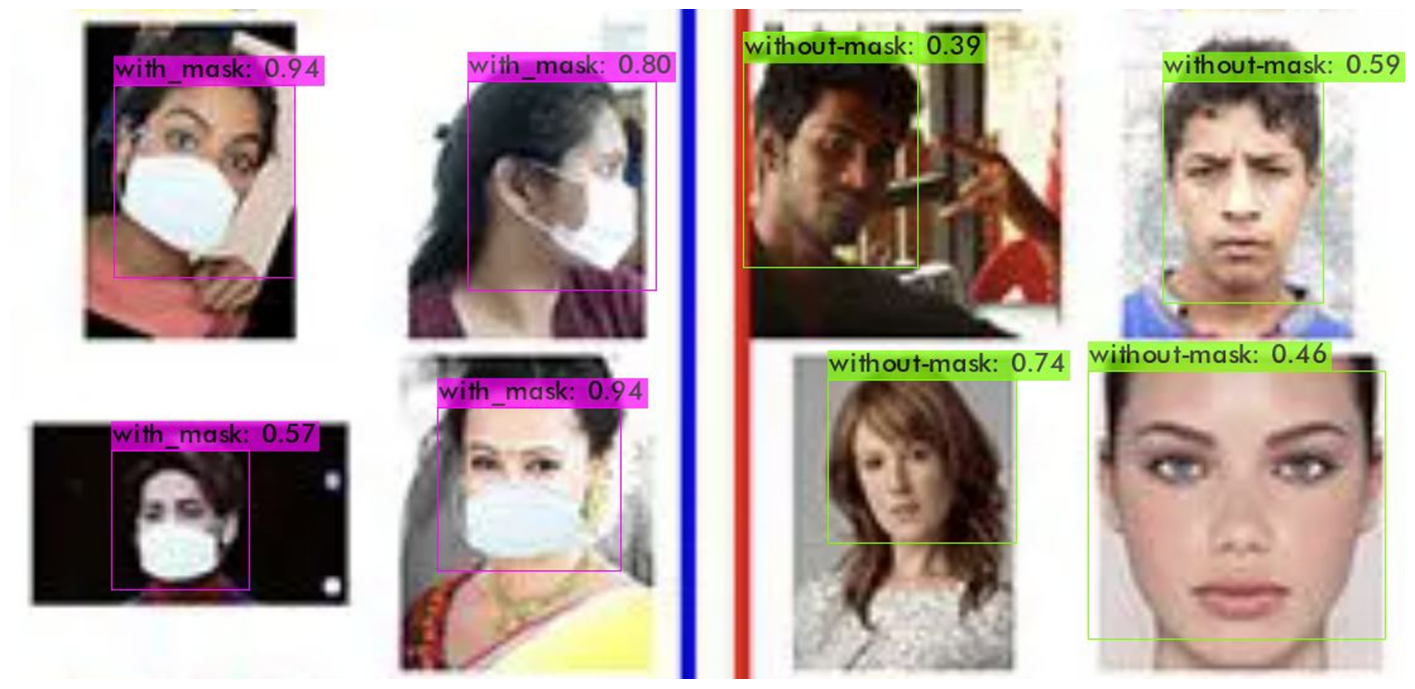

In [37]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test '/content/gdrive/MyDrive/defyolo/curropt/darknet/data/obj.data' '/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg/v4tinycustom.cfg' '/content/gdrive/MyDrive/defyolo/v4tiny/training/v4tinycustom_best.weights' '/content/gdrive/MyDrive/defyolo/testdata/testss.png' -thresh 0.3
imShow('predictions.jpg')

<IPython.core.display.Javascript object>

Saved to photo.jpg


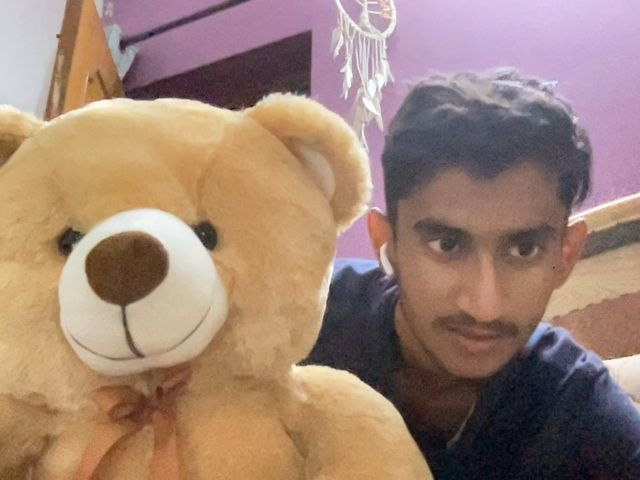

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

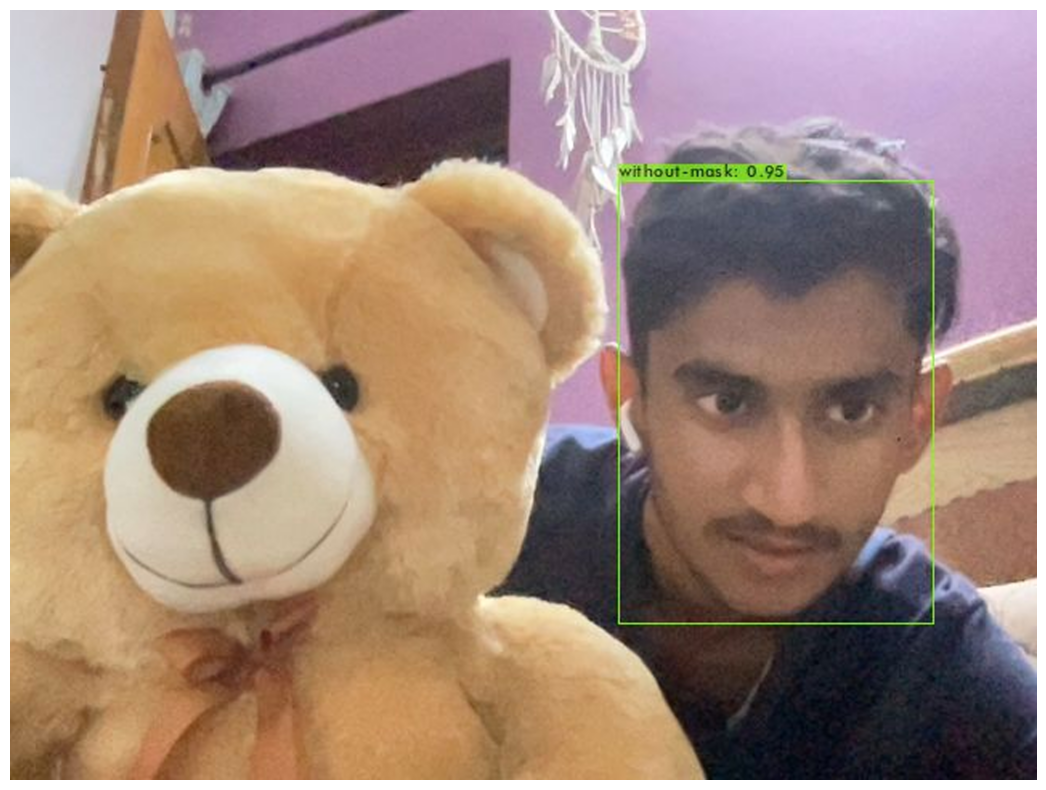

In [38]:
#Run detector on images captured by webcam for your custom YOLOv4-tiny trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

!./darknet detector test '/content/gdrive/MyDrive/defyolo/curropt/darknet/data/obj.data' '/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg/v4tinycustom.cfg' '/content/gdrive/MyDrive/defyolo/v4tiny/training/v4tinycustom_best.weights' photo.jpg -thresh 0.5
imShow('predictions.jpg')

In [ ]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

!./darknet detector demo '/content/gdrive/MyDrive/defyolo/curropt/darknet/data/obj.data' '/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg/v4tinycustom.cfg' '/content/gdrive/MyDrive/defyolo/v4tiny/training/v4tinycustom_best.weights' -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/result.avi

In [39]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
#adjusted for my custom YOLOv4-tiny trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network('/content/gdrive/MyDrive/defyolo/curropt/darknet/cfg/v4tinycustom.cfg', '/content/gdrive/MyDrive/defyolo/curropt/darknet/data/obj.data', '/content/gdrive/MyDrive/defyolo/v4tiny/training/v4tinycustom_best.weights')
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>